In [1]:
import pandas as pd
train_stop = pd.read_csv('../data/curated/train_distance_duration.csv')
school = pd.read_csv('../data/curated/school_distance_duration.csv')
mall = pd.read_csv('../data/curated/mall_distances_durations(final).csv')
park = pd.read_csv('../data/curated/park_distances_durations(final).csv')
rent = pd.read_csv('../rent_data/rent_cleaned.csv')
population_growth = pd.read_csv('../data/curated/population_postcode_SA2.csv')
affluence = pd.read_csv('../data/curated/affluence.csv')

In [2]:
park["min_duration"]=park["min_duration"]/60
mall["min_duration"]=mall["min_duration"]/60
school["min_duration"]=school["min_duration"]/60
train_stop["min_duration"]=train_stop["min_duration"]/60

Inverse index

In [2]:
park["min_duration"]=1/(park["min_duration"]/60)
mall["min_duration"]=1/(mall["min_duration"]/60)
school["min_duration"]=1/(school["min_duration"]/60)
train_stop["min_duration"]=1/(train_stop["min_duration"]/60)

In [3]:
park["min_distance"]=1/park["min_distance"]
mall["min_distance"]=1/mall["min_distance"]
school["min_distance"]=1/school["min_distance"]
train_stop["min_distance"]=1/train_stop["min_distance"]

Rename Column name

In [3]:
rent = rent.rename(columns={'listingSlug':'rent_address'})
school = school.rename(columns={'min_distance':'school_distance(m)', 'min_duration':'school_duration(min)'})
mall = mall.rename(columns={'min_distance':'mall_distance(m)', 'min_duration':'mall_duration(min)'})
park = park.rename(columns={'min_distance':'park_distance(m)', 'min_duration':'park_duration(min)'})
train_stop = train_stop.rename(columns={'min_distance':'train_stop_distance(m)', 'min_duration':'train_stop_duration(min)'})
population_growth = population_growth.rename(columns={'Postcode':'postcode','average change %':'population_growth_rate'})
affluence = affluence.rename(columns={'average':'weekly_income'})

Calculate average of diatance and duration

In [4]:
school = school[['postcode', 'school_distance(m)', 'school_duration(min)']].groupby('postcode').mean()
school = school.reset_index(drop=False)
mall = mall[['postcode', 'mall_distance(m)', 'mall_duration(min)']].groupby('postcode').mean()
mall = mall.reset_index(drop=False)
park = park[['postcode', 'park_distance(m)', 'park_duration(min)']].groupby('postcode').mean()
park = park.reset_index(drop=False)
train_stop = train_stop[['postcode', 'train_stop_distance(m)', 'train_stop_duration(min)']].groupby('postcode').mean()
train_stop = train_stop.reset_index(drop=False)

Merge each external feature without mean

In [7]:
rent_school = pd.merge(rent, school.iloc[:,1:5], how='inner', on='rent_address')
mall_park = pd.merge(mall.iloc[:,1:5], park.iloc[:,1:5], how='inner', on='rent_address')
population_forecast_affluence = pd.merge(population_growth[['postcode','population_growth_rate']],affluence[['postcode','weekly_income']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='rent_address')
combine = pd.merge(combine_df1, train_stop.iloc[:,1:5], how='left', on='rent_address')
external_feature = pd.merge(combine, population_forecast_affluence, how='left', on='postcode')

Merge each external feature with mean value

In [5]:
rent_school = pd.merge(rent, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population_growth_rate']],affluence[['postcode','weekly_income']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_stop, how='left', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='left', on='postcode')

In [6]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)

(1220, 16)
(144, 5)
(1220, 20)
(1220, 22)
(1220, 24)


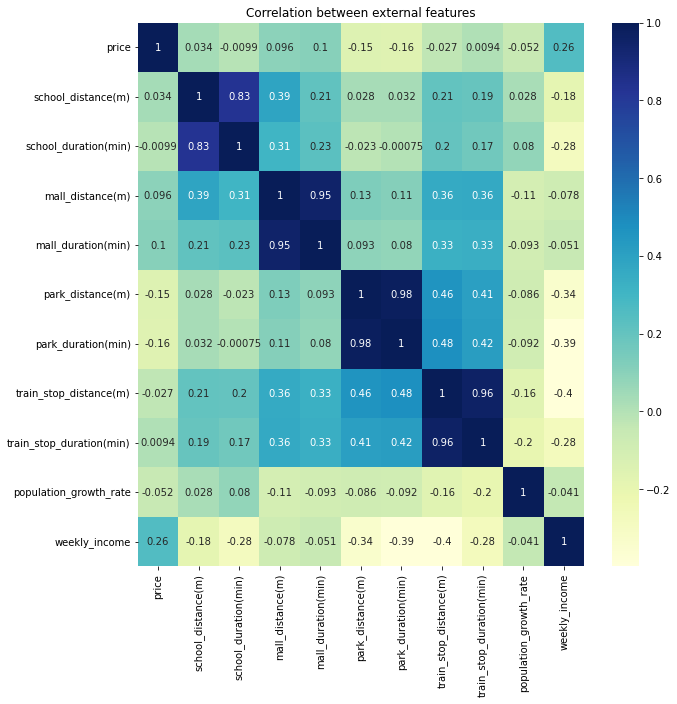

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)",'population_growth_rate','weekly_income']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features")
#plt.savefig("../plots/exteral_correlation.png")
plt.show()